# Homework \#1 (4 points)
Due June 23 @ 11:59pm

## Submission requirements
Upload a **single PDF file** of your IJulia notebook for this entire assigment. Clearly denote which question each section of your PDF corresponds to.

## Problem 1 - Getting Started with Julia/JuMP

Model the following problem in JuMP:

$\begin{align*}
\max & \ -3x_1 + 2x_2 + x_3\\
\text{s.t.} &\  2x_1 + x_2 \geq 4\\
& 2x_1 + x_3 \leq 5\\
& x_2 + 4x_3 \geq 2\\
& x_1, x_3 \geq 0, x_2  \leq 0
\end{align*}$

Solve this problem using Clp, ECOS, and SCS solvers.  Compare the answers found by each solver by answering the following:  
* Which solver is most accurate (gets closest to the "right" answer)?

: Clp.

* Which is fastest (use the @time macro)? (Note: you should run each solver several times to get an average time.)

: Clp. But, not a huge difference among them.

- 1st Trial: Clp = 0.001619 seconds / ECOS = 0.003548 seconds / SCS = 0.006163
- 2nd Trial: Clp = 0.001351 seconds / ECOS = 0.001689 seconds / SCS = 0.001689
- 3rd Trial: Clp = 0.001731 seconds / ECOS = 0.004513 seconds / SCS = 0.005805
- 4th Trial: Clp = 0.001721 seconds / ECOS = 0.004832 seconds / SCS = 0.007058
- 5th Trial: Clp = 0.002067 seconds / ECOS = 0.003190 seconds / SCS = 0.007076

=> Average solving time: Clp = 0.0016978 seconds / ECOS = 0.0035544 / SCS = 0.0055582
    
    
* Can you speculate as to why? 


* If there is no clear difference between the solvers, can you think of some factors that might contribute to solver speed differences? 

: Clp might have more effective algorithmic structure in terms of solving simple math models.


In [1]:
using JuMP
m = Model()

@variable(m, x1 >= 0)
@variable(m, x2 <= 0)
@variable(m, x3 >= 0)

@constraint(m, 2*x1 + x2 >= 4)
@constraint(m, 2*x1 + x3 <= 5)
@constraint(m, x2 + 4*x3 >= 2)

@objective(m, Max, -3*x1 + 2*x2 + x3)

-3 x1 + 2 x2 + x3

In [15]:
using Clp
println("Time to solve this model using Clp: ")

set_optimizer(m, Clp.Optimizer)
@time(optimize!(m))

println(m)
println()
println("x1 = ", value(x1) )
println("x2 = ", value(x2) )
println("x3 = ", value(x3) )
println("objective = ", objective_value(m) )

Time to solve this model using Clp: 
  0.001357 seconds (1.13 k allocations: 94.805 KiB)
Max r - w + 2 s + 1
Subject to
 u - v - 3 r <= -5.0
 -2 u + 2 v - w <= -3.0
 2 u - 2 v + w <= 3.0
 -u + v + s <= 0.0
 r - w <= 1.0
 u >= 0.0
 v >= 0.0
 r >= 0.0
 w >= 0.0
 s >= 0.0
 w <= 2.0


x1 = 1.9999999375526916
x2 = 8.61622034007905e-8
x3 = 1.0000001243986558
objective = 4.0
Coin0506I Presolve 3 (-2) rows, 2 (-3) columns and 6 (-8) elements
Clp0006I 0  Obj 2.7999999 Primal inf 0.79999807 (2) Dual inf 1.999999 (1)
Clp0006I 2  Obj 4
Clp0000I Optimal - objective value 4
Coin0511I After Postsolve, objective 4, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 4 - 2 iterations time 0.002, Presolve 0.00


In [16]:
using ECOS

println("Time to solve this model using ECOS: ")
set_optimizer(m, ECOS.Optimizer)
@time(optimize!(m))

println(m)
println()
println("x1 = ", value(x1) )
println("x2 = ", value(x2) )
println("x3 = ", value(x3) )
println("objective = ", objective_value(m) )

Time to solve this model using ECOS: 
  0.003363 seconds (2.46 k allocations: 200.797 KiB)
Max r - w + 2 s + 1
Subject to
 u - v - 3 r <= -5.0
 -2 u + 2 v - w <= -3.0
 2 u - 2 v + w <= 3.0
 -u + v + s <= 0.0
 r - w <= 1.0
 u >= 0.0
 v >= 0.0
 r >= 0.0
 w >= 0.0
 s >= 0.0
 w <= 2.0


x1 = 1.9999999375526916
x2 = 8.61622034007905e-8
x3 = 1.0000001243986558
objective = 4.000000000038225

ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -8.533e-01  -1.099e+00  +6e+01  4e-01  5e-01  1e+00  5e+00    ---    ---    1  1  - |  -  - 
 1  -3.288e+00  -3.225e+00  +6e+00  3e-02  4e-02  2e-01  5e-01  0.9164  3e-02   0  0  0 |  0  0
 2  -3.003e+00  -3.000e+00  +2e-01  6e-04  9e-04  4e-03  1e-02  0.9758  2e-03   0  0  0 |  0  0
 3  -3.000e+00  -3.000e+00  +2e-03  7e-06  1e-05  5e-05  2e-04  0.9890  1e-04   1  0  0 |  0  0
 4  -3.000e+00  -3.000e+00  +2e-05  7e-08  

In [17]:
using SCS

println("Time to solve this model using SCS: ")
set_optimizer(m, SCS.Optimizer)
@time(optimize!(m))

println(m)
println()
println("x1 = ", value(x1) )
println("x2 = ", value(x2) )
println("x3 = ", value(x3) )
println("objective = ", objective_value(m) )

Time to solve this model using SCS: 
  0.005570 seconds (1.65 k allocations: 128.836 KiB)
Max r - w + 2 s + 1
Subject to
 u - v - 3 r <= -5.0
 -2 u + 2 v - w <= -3.0
 2 u - 2 v + w <= 3.0
 -u + v + s <= 0.0
 r - w <= 1.0
 u >= 0.0
 v >= 0.0
 r >= 0.0
 w >= 0.0
 s >= 0.0
 w <= 2.0


x1 = 1.9999999375526916
x2 = 8.61622034007905e-8
x3 = 1.0000001243986558
objective = 4.000008272886374
----------------------------------------------------------------------------
	SCS v2.1.3 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 20, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 5, constraints m = 11
Cones:	linear vars: 11
Setup time: 8.33e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | r

## Problem 2 - Delicious Bean Juice

Suppose you've been hired as a consultant for your favorite local coffeeshop, "Coffee Co." Coffee Co is trying to find an optimal combination of beans for a new blend they're creating to celebrate summer. The two beans they are planning to use are single-origin: one is from Colombia and one is from Uganda. The Colombian beans are fruitier than the Ugandan beans by a ratio of 2:1 (i.e., Coffee Co gets 2 "units" of fruitiness for every ounce of Colombian beans used, and only 1 "unit" of fruitiness for every ounce of Ugandan beans used). Coffee Co would like to maximize the total fruitiness of the blend.

The table below summarizes a couple more characteristics of each ounce of each type of bean. 

|Bean origin | Acidity (per ounce) |Nuttiness (per ounce)| 
|--------:|---------------:|---------------:|
|Colombia|-3 |2 |
|Uganda|1 |3|

Coffee Co wants to ensure that the acidity of the summer blend is at least 3 and the nuttiness is no more than 24. Furthermore, due to an arrangement with the growers, Coffee Co must use at least 5 oz of Ugandan beans.

(a)  Formulate a linear program to help Coffee Co figure out how many ounces of each bean to add to the blend to maximize the total fruitiness. State the math model, then code and solve the model using Julia.

: Add 1.3636363636363638 Colombian beans and 7.090909090909091 Ugandian beans.Thus, total fruitness will be 9.818181818181818

In [5]:
using JuMP, Clp

m = Model()

@variable(m, co >= 0)
@variable(m, ug >= 5)

@objective(m, Max, 2*co + ug)

@constraint(m, acidity_con, -3*co + ug >= 3)
@constraint(m, nuttiness_con, 2*co + 3*ug <= 24);

In [6]:
set_optimizer(m, Clp.Optimizer)
optimize!(m)

println("Add ", value(co), " Colombian beans.")
println("Add ", value(ug), " Ugandian beans.")
println("Total fruitness will be ", objective_value(m))

Add 1.3636363636363638 Colombian beans.
Add 7.090909090909091 Ugandian beans.
Total fruitness will be 9.818181818181818
Coin0506I Presolve 0 (-2) rows, 0 (-2) columns and 0 (-4) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 9.8181818
Coin0511I After Postsolve, objective 9.8181818, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 9.818181818 - 0 iterations time 0.002, Presolve 0.00


#### (b)  Code the same model once again, this time separating the parameters from the solution as we did in class (see Top Brass examples).  Confirm that you obtain the same solution as in part (a).  

: The answer is same as above: add 1.3636363636363638 colombian beans, 7.090909090909091 ugandian beans, total fruitness is 9.818181818181818

In [7]:
using JuMP, Clp

m = Model(Clp.Optimizer)

bean_types = [:colombia, :uganda]

@variable(m, bean[bean_types] >= 0)

@objective(m, Max, (2*bean[:colombia] + bean[:uganda]) )

@constraint(m, bean[:uganda] >= 5)
@constraint(m, -3*bean[:colombia] + bean[:uganda] >= 3)
@constraint(m, 2*bean[:colombia] + 3*bean[:uganda] <= 24)

status = optimize!(m)

println(value.(bean))
println("Total fruitness will be ", objective_value(m))

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, [:colombia, :uganda]
And data, a 2-element Vector{Float64}:
 1.3636363636363638
 7.090909090909091
Total fruitness will be 9.818181818181818
Coin0506I Presolve 0 (-3) rows, 0 (-2) columns and 0 (-5) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 9.8181818
Coin0511I After Postsolve, objective 9.8181818, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 9.818181818 - 0 iterations time 0.002, Presolve 0.00


#### (c)  Solve  the  problem  graphically  by  plotting  the  feasible  set  and  at least two isoprofit lines for  the  objective function.  Confirm that you obtain the same solution as in the previous parts.

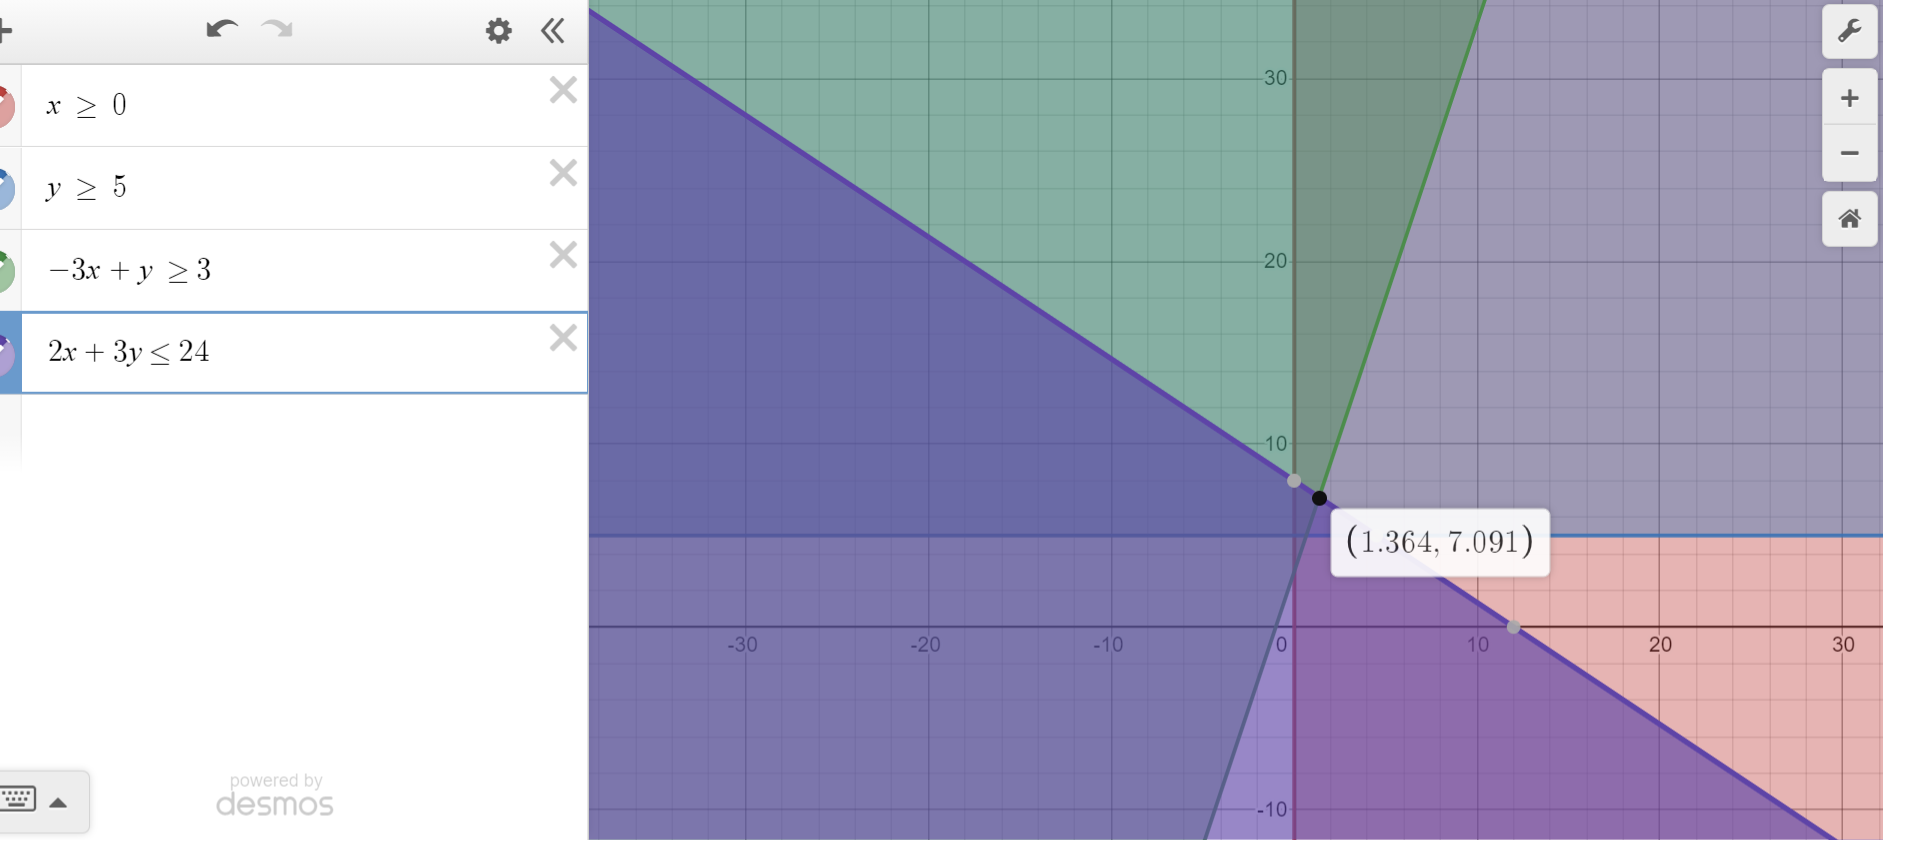

## Problem 3 - A more complicated coffee blend

Suppose Coffee Co has been very successful with their new coffee blends, and they would like to ramp up production significantly. Coffee Co can source beans from a variety of different locations, each with a different cost/ounce to ship. Each bean can be roasted using one of three different methods. Each roasting method produces slightly different resulting flavor profiles. 

The cost data is provided in "coffeecost.csv" and the flavor profiles for each roasting method are given in "roastflavor.csv" on Canvas. You can use the code snippet provided below to read the .csv files and load them into Julia, or you can read/load the data in any way you choose.

The cost data has the following structure, where each row shows a different bean source. The first column shows the cost per ounce to ship from that location, and the second column shows the total number of ounces available at that location. 


|Source | Cost/ounce (\$) |Available (oz) |
|--------:|---------------:|---------------:|
|1| 0.98| 1068|
|2| 0.82 |1462|
|$\vdots$|$\vdots$ |$\vdots$ |

The flavor data has the following structure, where each row shows a roasting method. The first column gives a cost per ounce to use that method. Each subsequent gives a flavor element and the value of the "flavor units" produced by each of the roasting methods. The last two rows given lower and upper bounds on each flavor element, respectively.


|Roasting method | Cost/ounce (\$) |Acidity|Nuttiness|$\dotsm$|
|--------:|---------------:|---------------:|---------:|----:|
|1| 0.2| 0.6|1.0|  $\dotsm$|
|$\vdots$|$\vdots$ |$\vdots$ |$\vdots$  |$\ddots$ |
| Minimum | |583| 439| $\dotsm$|
| Maximum | |5000 |4608 | $\dotsm$|


(a) Formulate a linear program that Coffee Co can use to determine the optimal sourcing and roasting methods for producing 5000 ounces of coffee at minimal cost. Give a general form (no numbers) of the math model.

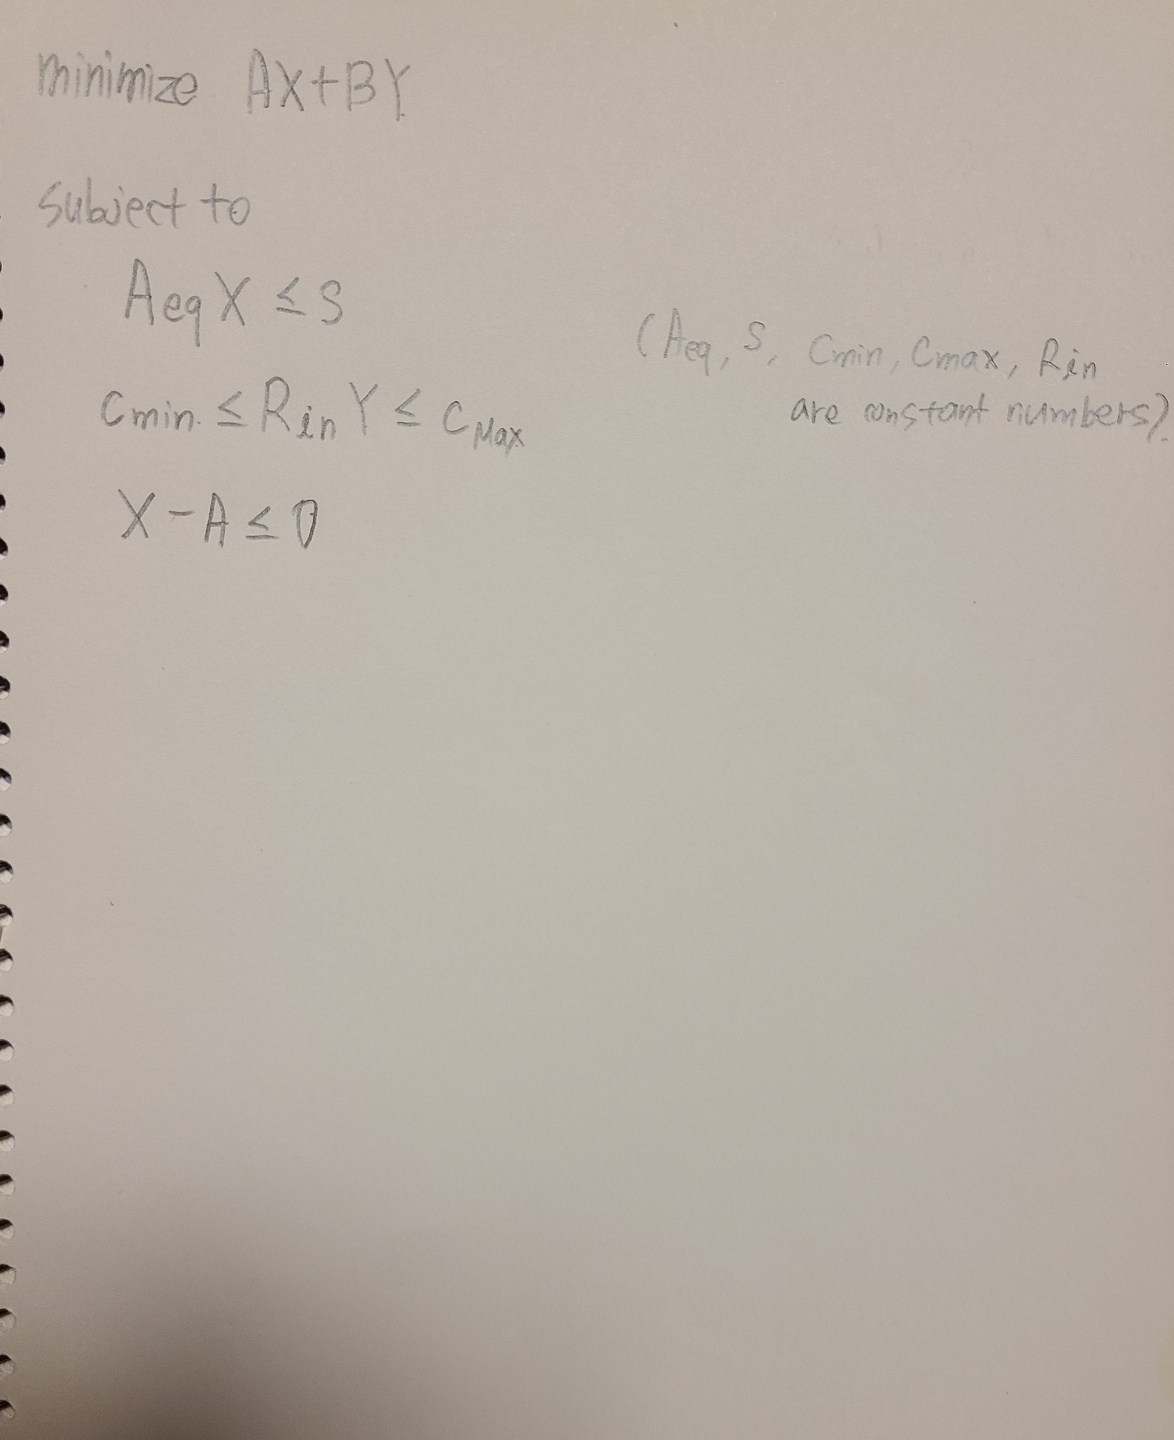

(b) Implement and solve this instance of the model in Julia/JuMP.  Display the optimal objective value and the optimal sourcing \& roasting. 

In [8]:
#You might need to run "Pkg.add(...)" before using these packages
using DataFrames, CSV, NamedArrays

#Load the data file
df = CSV.read("coffeecost.csv",DataFrame,delim=',');

# create a list of coffee sources
sources = convert(Array,df[1:end,1])
# create a dictionary of the cost of shipping from each source (per ounce)
ship_cost = Dict(zip(sources,df[1:end,2]))
# create a dictionary of the total ounces available from each source
avail = Dict(zip(sources,df[1:end,3]))

# now read in the "roastflavor.csv" file
df2 = CSV.read("roastflavor.csv",DataFrame, delim =',');

# create a list of roasting methods
roasts = convert(Array,df2[1:3,1])

# create a list of flavor elements
flavors = propertynames(df2)[3:end]

# create a dictionary of the minimum flavor elements
min_flav = Dict(zip(flavors,df2[4,3:end]))

# create a dictionary of the maximum flavor elements
max_flav = Dict(zip(flavors,df2[5,3:end]))

roast_flavor_array = Matrix(df2[1:3,3:end])
# rows are roasting methods, columns are flavors
roast_flavor_array = NamedArray(roast_flavor_array, (roasts, flavors),("roasts","flavors"))

# create a dictionary of the cost of roasting (per ounce)
roast_cost = Dict(zip(roasts,df2[1:end,2]));

In [9]:
using JuMP,  Clp
m = Model(Clp.Optimizer)

@variable(m, x[sources] >= 0)
@variable(m, y[roasts] >= 0)
@variable(m, av[values(sort(avail))] >= 0)

@expression(m, tot_ship_cost, sum(ship_cost[i] * x[i]  for i in sources))
@expression(m, tot_roast_cost, sum(roast_cost[i] * y[i] for i in roasts))
@expression(m, tot_cost, tot_ship_cost + tot_roast_cost)

@objective(m, Min, tot_cost)

@constraint(m, x_sum, sum(x) <= 5000)
@constraint(m, flavor_req_1[flavor in flavors], sum(roast_flavor_array[r, flavor] for r in roasts) >= min_flav[flavor])
@constraint(m, flavor_req_2[flavor in flavors], sum(roast_flavor_array[r, flavor] for r in roasts) <= max_flav[flavor])
#@constraint(m, ship_req, (x[i]- avail[i] for i in sources) <= 0)

optimize!(m)
println("The minimal cost is ", objective_value(m))

The minimal cost is 0.0
Coin0507I Presolve determined that the problem was infeasible with tolerance of 1e-08
Clp3003W Analysis indicates model infeasible or unbounded
Clp0006I 0  Obj 0 Primal inf 3999.7 (5)
Clp0001I Primal infeasible - objective value 0
Clp0032I PrimalInfeasible objective 0 - 0 iterations time 0.002



## Problem 4 - More Modeling Practice


Consider the following LP:

$\begin{align*}
\min & \ -x_1 + x_2 + 2x_4\\
\text{s.t.} &\  3x_1-x_3 \geq 5\\
& x_2 + 2x_3 = 2\\
& x_3 \geq -x_4\\
& x_1 -x_2 \leq 2\\
& x_1 \geq 0, -1 \leq x_2 \leq 1, x_4 \leq 0
\end{align*}$

(a) Convert the problem to standard form.

\begin{align*}
\underset{u,v,w,r,s}{-\max} \ & r-w+1+2s & \\
\text{s.t.} \ & -3r + u - v \leq -5&\\
& -w -2u +2v \leq -3 &\\
& w+2u-2v \leq 3 &\\
& -u+v+s \leq 0 &\\
& r-w \leq 1\\
& r \geq 0\\
& w \leq 2\\
& s \geq 0
\end{align*}

Where $x_1 = r$, $x_2 = w-1$, $x_3 = u-v$, and $x_4 = -s$.

(b) What are $A$, $b$, $c$,and $x$?  Be sure to explain how the decision variables of your transformed LP relate to those of the original LP. 

$$ A = \begin{bmatrix}
-3 & 0 & 1 & -1 & 0 \\ 
0 & -1 & -2 & 2 & 0 \\
0 & 1 & 2 & -2 & 0 \\
0 & 0 & -1 & 1 & 1 \\
1 & -1 & 0 & 0 & 0 \\
\end{bmatrix}$$
<br>

$$ b = \begin{bmatrix}
-5 \\
-3 \\
3 \\
0 \\
1\\
\end{bmatrix}$$
<br>

$$ c = \begin{bmatrix} 1 & -1 & 0 & 0 & 2 \\  \end{bmatrix}$$
<br>

$$ x = \begin{bmatrix}
r \\
w \\
u \\
v\\
s
\end{bmatrix}$$
<br>

(c) Solve the standard-form LP in Julia and report the objective value and the value of each decision variable in an optimal solution to the original LP. 

In [10]:
# Original LP
using JuMP, Clp
m = Model(Clp.Optimizer)

@variable(m,x[1:4])

@objective(m, Min, -x[1] + x[2] + 2*x[4])

@constraint(m, 3*x[1] - x[3] >= 5)
@constraint(m, x[2] + 2*x[3] == 2)
@constraint(m, x[3] + x[4] >= 0)
@constraint(m, x[1] - x[2] <= 2)
@constraint(m, x[1] >= 0)
@constraint(m, -1 <= x[2] <= 1)
@constraint(m, x[4] <= 0)

optimize!(m)
println(m)
println("x1 = ", value(x[1]))
println("x2 = ", value(x[2]))
println("x3 = ", value(x[3]))
println("x4 = ", value(x[4]))
println("objective = ", objective_value(m))

Min -x[1] + x[2] + 2 x[4]
Subject to
 x[2] + 2 x[3] == 2.0
 3 x[1] - x[3] >= 5.0
 x[3] + x[4] >= 0.0
 x[1] >= 0.0
 x[1] - x[2] <= 2.0
 x[4] <= 0.0
 x[2] in [-1.0, 1.0]

x1 = 2.0
x2 = 0.0
x3 = 1.0
x4 = -1.0
objective = -4.0
Coin0506I Presolve 0 (-7) rows, 0 (-4) columns and 0 (-11) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value -4
Coin0511I After Postsolve, objective -4, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -4 - 0 iterations time 0.002, Presolve 0.00


In [11]:
# Standard Form
using JuMP, Clp
m = Model(Clp.Optimizer)

@variable(m, u >= 0)
@variable(m, v >= 0)
@variable(m, r >= 0)
@variable(m, 0 <= w <= 2)
@variable(m, s >= 0)

@objective(m, Max, r - w + 1 + 2*s)

@constraint(m, -3*r + u - v <= -5)
@constraint(m, -w - 2*u + 2*v <= -3)
@constraint(m, w + 2*u - 2*v <= 3)
@constraint(m, -u + v + s <= 0)
@constraint(m, r - w <= 1)

optimize!(m)
println(m)
println("x1 = ", value(r))
println("x2 = ", value(w-1))
println("x3 = ", value(u-v))
println("x4 = ", value(-s))
println("objective = ", -objective_value(m))

Max r - w + 2 s + 1
Subject to
 u - v - 3 r <= -5.0
 -2 u + 2 v - w <= -3.0
 2 u - 2 v + w <= 3.0
 -u + v + s <= 0.0
 r - w <= 1.0
 u >= 0.0
 v >= 0.0
 r >= 0.0
 w >= 0.0
 s >= 0.0
 w <= 2.0

x1 = 1.9999999999999996
x2 = -4.440892098500626e-16
x3 = 1.0000000000000002
x4 = -1.0000000000000002
objective = -4.0
Coin0506I Presolve 3 (-2) rows, 2 (-3) columns and 6 (-8) elements
Clp0006I 0  Obj 2.7999999 Primal inf 0.79999807 (2) Dual inf 1.999999 (1)
Clp0006I 2  Obj 4
Clp0000I Optimal - objective value 4
Coin0511I After Postsolve, objective 4, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 4 - 2 iterations time 0.002, Presolve 0.00
